In [374]:
import numpy as np
import pandas as pd
from scipy import signal
from matplotlib import pyplot as plt
data = pd.read_csv('train.csv')

In [375]:
# Use DataFrame.head() and DataFrame.tail() to view the top and bottom rows of the frame respectively:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


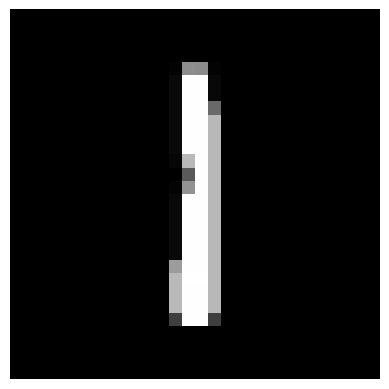

In [376]:
data = np.array(data)

def plot_mnist_image(image_array):
    image = image_array.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Turn off axis
    plt.show()

plot_mnist_image(data[2, 1:])

In [377]:
m, n = data.shape
print(m,n)

42000 785


In [378]:
np.random.shuffle(data) # Shuffles all the individual rows
data_dev = data[0:1000].T #Take the first 1000 rows, and transpose the matrix to get 1000 examples as column vectors
data_dev

array([[4, 5, 3, ..., 3, 1, 4],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [379]:
Y_dev = data_dev[0] #Takes the first row, which contains all of the answers to the numbers (the Y is what we want)

In [361]:
X_dev = data_dev[1:]

In [380]:
X_dev = X_dev.reshape(28,28,1000)
print(X_dev.shape)

(28, 28, 1000)


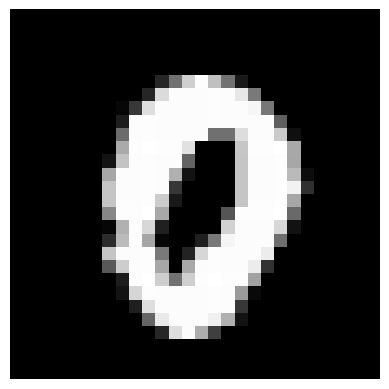

4


In [381]:
# print(X_dev[:,:,1])
plot_mnist_image(X_dev[:,:,6])
print(Y_dev[6])

In [382]:
data_train = data[1000:m].T
Y_train = data_train[0]

In [383]:
X_train= data_train[1:n] #Takes all of the data corresponding to all of the entries
X_train = X_train.reshape(28,28,41000)

In [388]:
# X_test = X_train[:,:,2:4]
# X_test.shape

In [389]:
# weights = np.random.rand(5,5)
# X_test = signal.convolve2d(X_test, weights, mode = 'valid')
# X_test.shape

In [390]:
def ReLU(Z): # Takes in a scalar, returns a scalar
    return np.maximum(Z, 0)

def softmax(Z):
    # Apply softmax column-wise
    exp_Z = np.exp(Z - np.max(Z, axis=0))  # Subtracting the maximum value in each column to avoid overflow
    return exp_Z / np.sum(exp_Z, axis=0)

In [391]:
def max_pooling(input_data):
    # 24, 24, 2
    input_height, input_width, input_depth = input_data.shape

    # Calculate the output dimensions
    output_height = input_height // 2 # 12
    output_width = input_width // 2 # 12
    output_depth = input_depth # 2 - depth stays the same

    # Initialize the output array and array to store indices
    output_data = np.zeros((output_height, output_width, output_depth))
    indices = np.zeros((output_height, output_width, output_depth, 2), dtype=int)

    # Apply max pooling
    for h in range(output_height):
        for w in range(output_width):
            for d in range(output_depth):
                # Extract the 2x2 region of interest from the input data
                region = input_data[h*2:(h+1)*2, w*2:(w+1)*2, d]
                # Compute the maximum value in the region
                max_val = np.max(region)
                output_data[h, w, d] = max_val
                # Find the indices of the maximum value in the region
                max_indices = np.unravel_index(np.argmax(region), region.shape)
                # Store the indices relative to the region and convert to global indices
                indices[h, w, d] = [h*2 + max_indices[0], w*2 + max_indices[1]]

    return output_data, indices


In [392]:
# # Example usage:
# input_data = np.random.rand(4,4,2)

# print(input_data.shape)
# output_data, indices = max_pooling(input_data)
# print("Input data:")
# print(input_data[:,:,:])
# print(input_data.shape)
# print("\nOutput data after max pooling:")
# # print(output_data)
# print(output_data.shape)
# print("\nIndices of max values:")
# print(indices)
# print(indices.shape)


In [394]:
# Initalize layer
def params():
    layer_weights = np.random.rand(5,5,2) - 0.5
    layer_bias = np.random.rand(24,24,2) - 0.5
    layer_output = np.zeros((24,24,2))
    fc_weights = np.random.rand(10, 288) - 0.5
    fc_bias = np.random.rand(10) - 0.5
    return layer_weights, layer_bias, layer_output, fc_weights, fc_bias

def forward_propogation(layer_input, layer_weights, layer_bias, layer_output, fc_weights, fc_bias):
    # Convolution
    for i in range(layer_filters):
        layer_output[:,:,i] = signal.correlate2d(layer_input, weights, mode = 'valid')
    layer_output = layer_output + layer_bias
    
    # Activation layer
    ReLU(layer_output.shape)
    layer_output.shape
    
    # Pool layer
    layer_pool, layer_indices = max_pooling(layer_output)
    
    # Flattening
    layer_pool = layer_pool.reshape(288)

    # Fully connected layer
    final_output = fc_weights.dot(layer_pool) # (10 x 288 ) ( 288 x 1 )
    final_output = final_output + fc_bias
    final_output = softmax(final_output)

    return layer_output, layer_pool, final_output

def create(Y):
  column_Y = np.zeros((10,))
  column_Y[Y-1] = 1
  column_Y = column_Y.T
  return column_Y

In [395]:
# Backpropogation through layers

def back_prop(layer_output, layer_pool, final_output):
    delta_conv_weights = np.zeros((5,5,2))
    delta_conv_bias = np.zeros((24,24,2)) 
    delta_fc_weights = np.zeros((10, 288))
    delta_fc_bias = np.zeros((10))
    
    # Backpropogate cost
    dZ = (final_output - x) # 10 x 1
    dZ = dZ.reshape((10,1))
    layer_pool = layer_pool.reshape((1,288))
    #Backpropogate weights and biases
    delta_fc_weights = dZ.dot(layer_pool) # (10 x 1 ) (1 x 288) = (10 x 288)
    delta_fc_bias = dZ
    
    # Backpropogate error
    dZ_pool_output = (fc_weights.T)
    
    # Unflattening
    dZ_pool_output = dZ_pool.reshape(12,12,2)
    
    # Unpooling
    dZ_pool_input = np.zeros((24,24,2))
    for i in range(12): # height
        for j in range(12): # width
            for k in range(2): # depth
                # Get the global indices from layer_indices
                x_index, y_index = layer_indices[i, j, k]
                # Assign the gradient from dZ_pool_output to the corresponding position in dZ_pool_input
                dZ_pool_input[x_index, y_index, k] = dZ_pool_output[i, j, k]
    
    # Backpropogating convolutional layer - dZ_pool_input is the output of the convolutional layer
    for i in range(2): # For each filter in the kernel - # of filters = 2
        delta_conv_weights[:,:,i] = signal.correlate(layer_input, dZ_pool_input[:,:,i], mode = "valid")
    delta_conv_bias = dZ_pool_input

    return delta_conv_weights, delta_conv_bias, delta_fc_weights, delta_fc_bias

def update_params(layer_weights, layer_bias, fc_weights, fc_bias, delta_conv_weights, delta_conv_bias, delta_fc_weights, delta_fc_bias, learning_rate):
    layer_weights = layer_weights - learning_rate * delta_conv_weights
    layer_bias = layer_bias - learning_rate * delta_conv_bias
    fc_weights = fc_weights -learning_rate * delta_fc_weights
    fc_bias = fc_bias - learning_rate * delta_fc_bias
    return layer_weights, layer_bias, fc_weights, fc_bias

def get_prediction(A2):
  return np.argmax(A2, 0)

In [396]:
layer_input = X_train[i]
print(layer_input.shape)

(28, 41000)


In [399]:
def gradient_descent(X_train, X_dev, Y_train, Y_dev, epochs, alpha):
    layer_weights, layer_bias, layer_output, fc_weights, fc_bias = params()
    for i in range(epochs):
        # Get a single training example
        layer_input = X_train[:,:,i]
        # Forward propogation
        layer_output, layer_pool, final_output = forward_propogation(layer_input, layer_weights, layer_bias, layer_output, fc_weights, fc_bias)

    
        delta_conv_weights, delta_conv_bias, delta_fc_weights, delta_fc_bias = back_prop(layer_output, layer_pool, final_output)
        layer_weights, layer_bias, fc_weights, fc_bias = update_params(layer_weights, layer_bias, fc_weights, fc_bias, delta_conv_weights, delta_conv_bias, delta_fc_weights, delta_fc_bias, learning_rate)
        for i in range(200):
            counter = 0;
            layer_output, layer_pool, final_output = forward_propogation(X_dev[i], layer_weights, layer_bias, layer_output, fc_weights, fc_bias)
            prediction = get_prediction(layer_output)
            if (prediction == Y_dev[i]):
                counter = counter + 1
        print("Epoch:", i)
        print("Accuracy:", counter/200)

    return layer_weights, layer_bias, layer_output, fc_weights, fc_bias

In [400]:
print("hello")
layer_weights, layer_bias, layer_output, fc_weights, fc_bias = gradient_descent(X_train, X_dev, Y_train, Y_dev, 10, 0.01)

hello


ValueError: could not broadcast input array from shape (5,40977) into shape (5,5)